# Data Preparation

Key Columns:
* realSum: Price of accommodation (numeric).
* room_type, room_shared, room_private: Type of property and dummy variables for property types (categorical).
* host_is_superhost: Indicates whether the host is a superhost (categorical, binary).
* cleanliness_rating, guest_satisfaction_overall: Key ratings for cleanliness and overall satisfaction (numeric).
* dist, metro_dist: Distances (numeric).


In [153]:
import pandas as pd
import numpy as num
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#read data in csv file
df = pd.read_csv('london airbnb.csv')
df.head(15)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728
5,5,239.892754,Private room,False,True,2.0,False,0,0,10.0,100.0,1,5.085730,1.806218,226.724964,15.759904,486.737052,8.715433,-0.17241,51.47222
6,6,324.090407,Private room,False,True,2.0,False,0,0,10.0,100.0,1,4.595055,0.296879,283.442608,19.702410,682.186718,12.215122,-0.19359,51.51061
7,7,155.695101,Private room,False,True,2.0,False,1,0,10.0,95.0,1,5.102453,1.013706,214.263962,14.893726,453.668124,8.123306,-0.15177,51.46504
8,8,129.353936,Private room,False,True,4.0,False,1,0,9.0,93.0,1,4.534041,1.772806,257.445014,17.895289,541.216973,9.690942,-0.16972,51.47724
9,9,246.007667,Entire home/apt,False,False,3.0,False,0,1,8.0,74.0,0,3.746655,0.417554,332.044947,23.080813,761.652285,13.638020,-0.18085,51.51343


In [155]:
#Data exploration
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

In [156]:
print (df.describe())

        Unnamed: 0       realSum  person_capacity        multi          biz  \
count  4614.000000   4614.000000      4614.000000  4614.000000  4614.000000   
mean   2306.500000    360.230348         2.832466     0.269397     0.422844   
std    1332.091401    507.782888         1.240572     0.443695     0.494065   
min       0.000000     64.676968         2.000000     0.000000     0.000000   
25%    1153.250000    167.454550         2.000000     0.000000     0.000000   
50%    2306.500000    256.355982         2.000000     0.000000     0.000000   
75%    3459.750000    435.452386         4.000000     1.000000     1.000000   
max    4613.000000  15499.894165         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         4614.000000                 4614.000000  4614.000000   
mean             9.153013                   90.324447     1.123754   
std              1.183012                   11.755838     0.581591   
min     

In [157]:
# Count distinct values in each field 
df[df.columns].nunique()

Unnamed: 0                    4614
realSum                       1752
room_type                        3
room_shared                      2
room_private                     2
person_capacity                  5
host_is_superhost                2
multi                            2
biz                              2
cleanliness_rating               9
guest_satisfaction_overall      47
bedrooms                         7
dist                          4614
metro_dist                    4614
attr_index                    4614
attr_index_norm               4614
rest_index                    4614
rest_index_norm               4614
lng                           4006
lat                           3544
dtype: int64

Data Cleaning

In [158]:
# Check for missing values
df.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [159]:
print(df['host_is_superhost'].unique())

[False  True]


In [160]:
#check and handle duplicates:
print(df.duplicated().sum())
#standardize str:
df['room_type'] = df['room_type'].astype('category')
df['host_is_superhost'] = df['host_is_superhost'].map({True: 1, False: 0})


0


In [161]:
#check numeric data:

df['realSum'] = pd.to_numeric(df['realSum'], errors='coerce')
df['person_capacity'] = pd.to_numeric(df['person_capacity'], errors='coerce')
df['cleanliness_rating'] = pd.to_numeric(df['cleanliness_rating'], errors='coerce')
df['guest_satisfaction_overall'] = pd.to_numeric(df['guest_satisfaction_overall'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['dist'] = pd.to_numeric(df['dist'], errors='coerce')
df['metro_dist'] = pd.to_numeric(df['metro_dist'], errors='coerce')
df['attr_index'] = pd.to_numeric(df['attr_index'], errors='coerce')
df['attr_index_norm'] = pd.to_numeric(df['attr_index_norm'], errors='coerce')
df['rest_index'] = pd.to_numeric(df['rest_index'], errors='coerce')
df['rest_index_norm'] = pd.to_numeric(df['rest_index_norm'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')

In [162]:

df[['realSum','person_capacity', 'cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat']].agg({ 'realSum': ['min', 'mean', 'max'],
                                                                                                                                                                                                    'person_capacity':['min', 'mean', 'max'],
                                                                                                                                                                                                    'cleanliness_rating': ['min', 'mean', 'max'],
                                                                                                                                                                                                    'guest_satisfaction_overall': ['min', 'mean', 'max'],
                                                                                                                                                                                                    'bedrooms':['min', 'mean', 'max'],
                                                                                                                                                                                                    'dist':['min', 'mean', 'max'],
                                                                                                                                                                                                    'metro_dist':['min', 'mean', 'max'],
                                                                                                                                                                                                    'attr_index':['min', 'mean', 'max'],
                                                                                                                                                                                                    'attr_index_norm':['min', 'mean', 'max'],
                                                                                                                                                                                                    'rest_index':['min', 'mean', 'max'],
                                                                                                                                                                                                    'rest_index_norm':['min', 'mean', 'max'],
                                                                                                                                                                                                    'lng':['min', 'mean', 'max'],
                                                                                                                                                                                                    'lat':['min', 'mean', 'max']})


,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
min,64.676968,2.000000,2.000000,20.000000,0.000000,0.040553,0.013904,68.740487,4.778228,140.521726,2.516159,-0.251700,51.416510
mean,360.230348,2.832466,9.153013,90.324447,1.123754,5.325023,0.992739,296.466825,20.607738,629.790258,11.276920,-0.114886,51.503262
max,15499.894165,6.000000,10.000000,100.000000,8.000000,17.321206,9.286229,1438.618956,100.000000,5584.771840,100.000000,0.120180,51.575820


In [163]:
print(df[df['realSum'] <= 0].shape[0])
print(df[df['guest_satisfaction_overall'] == 0].shape[0])

0
0


Text(0.5, 1.0, 'Boxplot of realSum by Room Type')

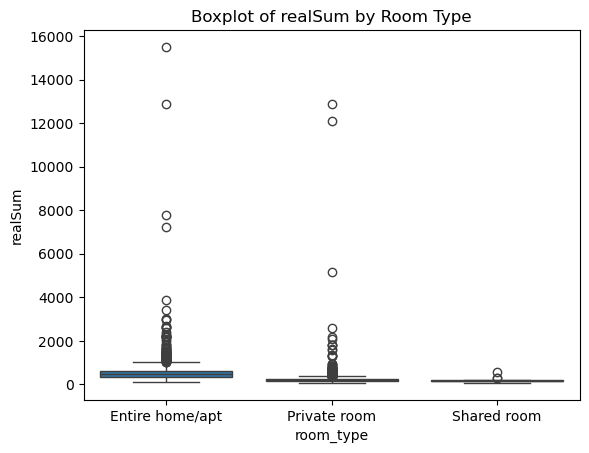

In [164]:
#Handle outliers
#Boxplot of `realSum` grouped by `room_type`
sns.boxplot(x='room_type', y='realSum', data=df)
plt.title('Boxplot of realSum by Room Type')

In [165]:
#IQR to detect outliers within each room type
def outliers_by_type(df ,col,cac):
    df_cleaned=pd.DataFrame()
#group by room type:
    for room_type, group in df.groupby(cac):
        Q1= group[col].quantile(0.25)
        Q3= group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Cap outliers = adjust extreme value
        group[col] = group[col].clip(lower=lower_bound, upper=upper_bound)
        df_cleaned = pd.concat([df_cleaned, group])
    return df_cleaned

#apply
df = outliers_by_type(df, 'realSum', 'room_type')

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/3436298668.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for room_type, group in df.groupby(cac):


<Axes: ylabel='guest_satisfaction_overall'>

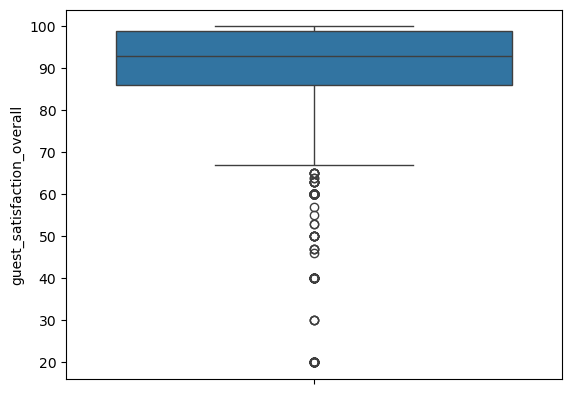

In [166]:
#boxplot for guest satisfaction
sns.boxplot(df['guest_satisfaction_overall'])

In [167]:
#Save cleaned dataset
df.to_csv('london_weekdays_cleaned.csv', index=False)
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,0,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
9,9,246.007667,Entire home/apt,False,False,3.0,0,0,1,8.0,74.0,0,3.746655,0.417554,332.044947,23.080813,761.652285,13.638020,-0.18085,51.51343
10,10,220.136880,Entire home/apt,False,False,2.0,0,0,1,9.0,79.0,0,3.789853,0.382663,323.640765,22.496629,740.677172,13.262443,-0.18092,51.51536
11,11,362.896587,Entire home/apt,False,False,2.0,0,1,0,8.0,83.0,1,4.639113,0.495528,270.077196,18.773366,664.521761,11.898817,-0.19317,51.51606
14,14,505.185917,Entire home/apt,False,False,4.0,0,0,1,9.0,90.0,3,4.487706,1.968880,255.954593,17.791688,526.338662,9.424533,-0.16550,51.47570


Data Manipulation

For the purpose of the analysis, there are 2 new columns needed to be added:
*Price Tiers: Low, Medium, High
*High Satisfaction Indicator: Binary column 

In [168]:
#Load the clean dataset:
df = pd.read_csv('london_weekdays_cleaned.csv')
print(df.head())
print(df.info())

   Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  570.098074  Entire home/apt        False         False   
1           9  246.007667  Entire home/apt        False         False   
2          10  220.136880  Entire home/apt        False         False   
3          11  362.896587  Entire home/apt        False         False   
4          14  505.185917  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0                  0      0    0                10.0   
1              3.0                  0      0    1                 8.0   
2              2.0                  0      0    1                 9.0   
3              2.0                  0      1    0                 8.0   
4              4.0                  0      0    1                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  5.30

In [169]:

#creating Price Tiers column by Room Type: 
#Defining function:
def price_tiers_creation (df, price_col, room_type_col, num_tiers=3):
    df['price_tier']= None 
    price_tiers =pd.DataFrame() #emty dataframe to store the final categorized data

#Grouping by room type and calculate tiers:
    for room_type, group in df.groupby(room_type_col):
        group['price_tier'] = pd.qcut(
            group[price_col],
            q=num_tiers,
            labels=[f'low',f'medium',f'high']
        )
        price_tiers = pd.concat([price_tiers, group])
    return price_tiers

df = price_tiers_creation(df, price_col= 'realSum', room_type_col='room_type')




In [170]:
#High satisfaction indicator:
#Create a binary column to label satisfaction scores as high if they meet a threshold : 85 out of 100.
#Allows for logistic regression or frequency analysis to identify factors associated with high satisfaction scores.
df['high_satisfaction'] = (df['guest_satisfaction_overall'] >= 85). astype(int)

#check
print(df['high_satisfaction'].value_counts())

high_satisfaction
1    3584
0    1030
Name: count, dtype: int64


In [171]:
#High cleanliness indicator:
df['high_cleanliness'] = (df['cleanliness_rating'] >= 8). astype(int)
#check:
print(df['high_cleanliness'].value_counts())

high_cleanliness
1    4305
0     309
Name: count, dtype: int64


In [172]:
# Aggregate Data
#Satisfaction by room type:
#Group the dataset by room_type, price tier, superhost and cleanliness to calculate mean satisfaction scores for each type (sub-question 1.1)
room_satisfaction = df.groupby('room_type')['guest_satisfaction_overall'].mean().reset_index()
#check
print(room_satisfaction)

         room_type  guest_satisfaction_overall
0  Entire home/apt                   88.963377
1     Private room                   91.368000
2      Shared room                   87.565217


In [173]:
# Features Associated with High Satisfaction 
# calculates and displays the distribution of high satisfaction (binary column high_satisfaction where 1 = high satisfaction) across dimensions: room type, price tier, cleanliness and Superhost status

#high satisfaction by room type:
room_high_satisfaction = df[df['high_satisfaction'] == 1]. groupby('room_type').size()
print("High satisfaction by room type:")
print(room_high_satisfaction)

High satisfaction by room type:
room_type
Entire home/apt    1463
Private room       2104
Shared room          17
dtype: int64


In [174]:
# High Satisfaction by Price Tiers
price_high_satisfaction = df[df['high_satisfaction'] == 1]. groupby('price_tier').size()
print("High satisfaction by price type:")
print(price_high_satisfaction)

High satisfaction by price type:
price_tier
low       1099
medium    1216
high      1269
dtype: int64


/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/1035926374.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_high_satisfaction = df[df['high_satisfaction'] == 1]. groupby('price_tier').size()


In [175]:
# High Satisfaction by Superhost status:
superhost_high_satisfaction = df[df['high_satisfaction'] == 1]. groupby('host_is_superhost').size()
print("High satisfaction by Superhost status:")
print(superhost_high_satisfaction)

High satisfaction by Superhost status:
host_is_superhost
0    2923
1     661
dtype: int64


In [176]:
# High Satisfaction by Cleanliness rating:
cleanliness_high_satisfaction = df[df['high_satisfaction'] == 1]. groupby('high_cleanliness').size()
print("High satisfaction by room cleanliness:")
print(cleanliness_high_satisfaction)

High satisfaction by room cleanliness:
high_cleanliness
0      29
1    3555
dtype: int64


In [177]:
df = df.drop(columns='Unnamed: 0')

In [178]:
df.to_csv('london_weekdays_manipulated.csv', index=False)
df= pd.read_csv('london_weekdays_manipulated.csv')
df.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,price_tier,high_satisfaction,high_cleanliness
0,570.098074,Entire home/apt,False,False,2.0,0,0,0,10.0,98.0,...,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531,high,1,1
1,246.007667,Entire home/apt,False,False,3.0,0,0,1,8.0,74.0,...,0.417554,332.044947,23.080813,761.652285,13.638020,-0.18085,51.51343,low,0,1
2,220.136880,Entire home/apt,False,False,2.0,0,0,1,9.0,79.0,...,0.382663,323.640765,22.496629,740.677172,13.262443,-0.18092,51.51536,low,0,1
3,362.896587,Entire home/apt,False,False,2.0,0,1,0,8.0,83.0,...,0.495528,270.077196,18.773366,664.521761,11.898817,-0.19317,51.51606,low,0,1
4,505.185917,Entire home/apt,False,False,4.0,0,0,1,9.0,90.0,...,1.968880,255.954593,17.791688,526.338662,9.424533,-0.16550,51.47570,medium,1,1
5,608.904255,Entire home/apt,False,False,4.0,0,0,0,10.0,90.0,...,0.201296,341.842316,23.761839,798.922066,14.305366,-0.17815,51.51484,high,1,1
6,512.947153,Entire home/apt,False,False,4.0,0,0,0,9.0,95.0,...,0.676367,321.456603,22.344805,684.328481,12.253472,-0.13300,51.54000,medium,1,1
7,1038.182930,Entire home/apt,False,False,6.0,0,1,0,10.0,93.0,...,0.686639,264.740473,18.402404,566.772524,10.148535,-0.18580,51.48336,high,1,1
8,362.661398,Entire home/apt,False,False,2.0,0,1,0,9.0,91.0,...,1.061380,217.659042,15.129722,476.158758,8.526020,-0.18361,51.47403,low,1,1
9,271.878454,Entire home/apt,False,False,3.0,0,0,1,9.0,93.0,...,0.281539,360.802517,25.079783,771.934702,13.822135,-0.06841,51.51610,low,1,1


# MAIN QUESTION: What factors affect customer satisfaction, and how can these factors guide hosts to improve their Airbnb ratings? 

Goal: 
To provide Airbnb hosts with actionable insights into the factors that drive customer satisfaction

Target Audience:

* Host
* Airbn

Structure:
Sub-question 1.1: lays the foundation by exploring how listing features (e.g., room_type, price_tier, cleanliness, etc.) are associated with high satisfaction.

Sub-question 1.2: focuses on the specific impact of room_type, providing a deeper dive into one of the key features identified in Sub-question 1.1.

Sub-question 1.3: examines the role of cleanliness, a feature that emerged as a top predictor in Sub-question 1.1.

Sub-question 1.4: investigates the relationship between pricing and satisfaction, adding depth to the pricing insights from Sub-question 1.1.

Sub-question 1.5: highlights the importance of host performance (host_is_superhost), another critical feature identified in Sub-question 1.1

Application:

* Optimize airbnb listing
* Improve airbn/hosts marketing strategies (competitive pricing, effective descriptions).
* Enhance the overall guest experience to drive repeat bookings and higher ratings.

# Sub - ques 1: Which listing features ( price tiers, room type, Superhost status, cleaningness or distance to city center) are most associated with high satisfaction scores?

Approach:
    1. Use frequency analysis to calculate the percentage of high satisfaction (high_satisfaction = 1) across features (room_type, price_tier, host_is_superhost, cleanliness_rating, dist).

	2. Perform logistic regression to quantify how features predict high satisfaction.

	3.  Visualize feature contributions with bar charts and feature importance.


Frequency analysis: Descriptive

Identifying the distribution of high satisfaction across features and visualizing the findings.

Because the propositions of each categories are uneven, the frequency analysis will be implemented to calculate the percentage of high satisfaction for each unique variable for categories with value type: Boolen and categories

In [179]:
#define function
def calculate_percentage_high_satisfaction(df, satisfaction_column, category_column):
    total_reviews = df[category_column].value_counts()
    high_satisfaction_point = df[df[satisfaction_column] == 1]
    # Count high satisfaction reviews for each category
    high_satisfaction_counts = high_satisfaction_point[category_column].value_counts()
    # Calculate percentage
    percentage_high_satisfaction = (high_satisfaction_counts / total_reviews) * 100
    return percentage_high_satisfaction

In [180]:
#By room type:
room_high_satisfaction = calculate_percentage_high_satisfaction(df, 'high_satisfaction', 'room_type')
print (f'high satisfaction by room type: {room_high_satisfaction}')

print ('')
print(df['room_type'].value_counts()) 

high satisfaction by room type: room_type
Private room       80.152381
Entire home/apt    74.415056
Shared room        73.913043
Name: count, dtype: float64

room_type
Private room       2625
Entire home/apt    1966
Shared room          23
Name: count, dtype: int64


In [181]:
#By price tiers
price_high_satisfaction = calculate_percentage_high_satisfaction(df, 'high_satisfaction', 'price_tier')
print (f'high satisfaction by price tier: {price_high_satisfaction}')

print ('')
print(df['price_tier'].value_counts()) 

high satisfaction by price tier: price_tier
high      82.509753
low       71.410006
medium    79.115159
Name: count, dtype: float64

price_tier
low       1539
high      1538
medium    1537
Name: count, dtype: int64


In [182]:
#By superhost status:
host_high_satisfaction = calculate_percentage_high_satisfaction(df, 'high_satisfaction', 'host_is_superhost')
print (f'high satisfaction by superhost status: {host_high_satisfaction}')

print ('')
print(df['host_is_superhost'].value_counts())

high satisfaction by superhost status: host_is_superhost
0    74.263211
1    97.492625
Name: count, dtype: float64

host_is_superhost
0    3936
1     678
Name: count, dtype: int64


In [183]:
#By cleaningliness:
cleanliness_high_satisfaction = calculate_percentage_high_satisfaction(df, 'high_satisfaction', 'high_cleanliness')
print (f'high satisfaction by cleanningliness status: {cleanliness_high_satisfaction}')

print ('')
print(df['high_cleanliness'].value_counts())

high satisfaction by cleanningliness status: high_cleanliness
1    82.578397
0     9.385113
Name: count, dtype: float64

high_cleanliness
1    4305
0     309
Name: count, dtype: int64


In [184]:
#By distance from city:
#Turn unique value to category 
df['dist_category'] = pd.cut(
    df['dist'],
    bins = [0, 2, 5, 10, 20],
    labels=['0-2 miles','2-5 miles', '5-10 miles', '10-20 miles']
)

#calulate
dist_high_satisfaction = calculate_percentage_high_satisfaction(df, 'high_satisfaction', 'dist_category')
print (f'high satisfaction by distance from city center: {dist_high_satisfaction}')

print('')
print(df['dist_category'].value_counts())


high satisfaction by distance from city center: dist_category
5-10 miles     80.089820
2-5 miles      74.496982
0-2 miles      78.446115
10-20 miles    82.959641
Name: count, dtype: float64

dist_category
5-10 miles     2004
2-5 miles      1988
0-2 miles       399
10-20 miles     223
Name: count, dtype: int64


Visualization:


In [185]:
# defining function for visualizing high satisfaction percentages for multiple features using bar plots.

def visualization_feature_proposotion (percentage_dict):
    for feature, percentages in percentage_dict.items():
        plt.figure(figsize=(8, 6))
        sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")
        plt.title(f'High satisfaction by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Percentage of high satisfaction')
        plt.ylim(0,100)
        plt.tight_layout()
        plt.show()

In [186]:
#Putting value and key into the dict
percentage_dict  ={
    'room_type': room_high_satisfaction,
    'price_tier': price_high_satisfaction,
    'host_is_superhost': host_high_satisfaction,
    'high_cleanliness':cleanliness_high_satisfaction,
    'dist_category': dist_high_satisfaction
}


/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/2636916914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


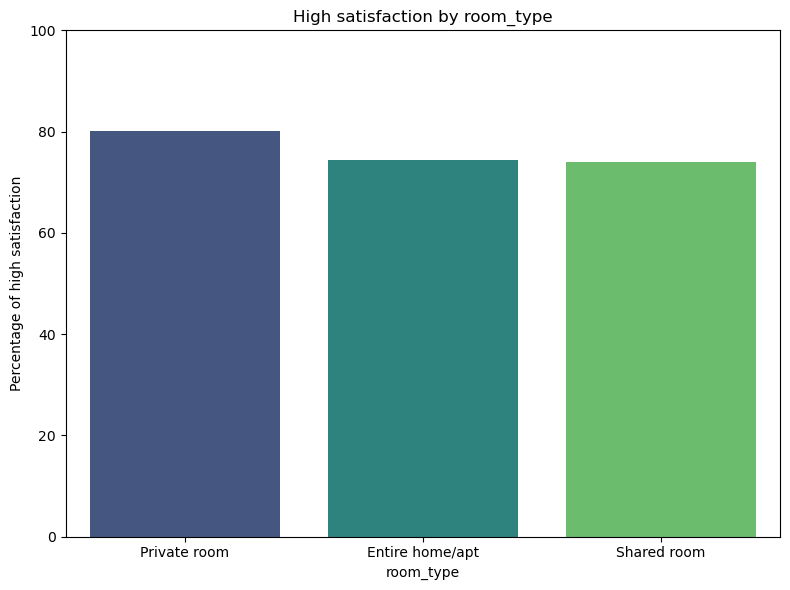

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/2636916914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


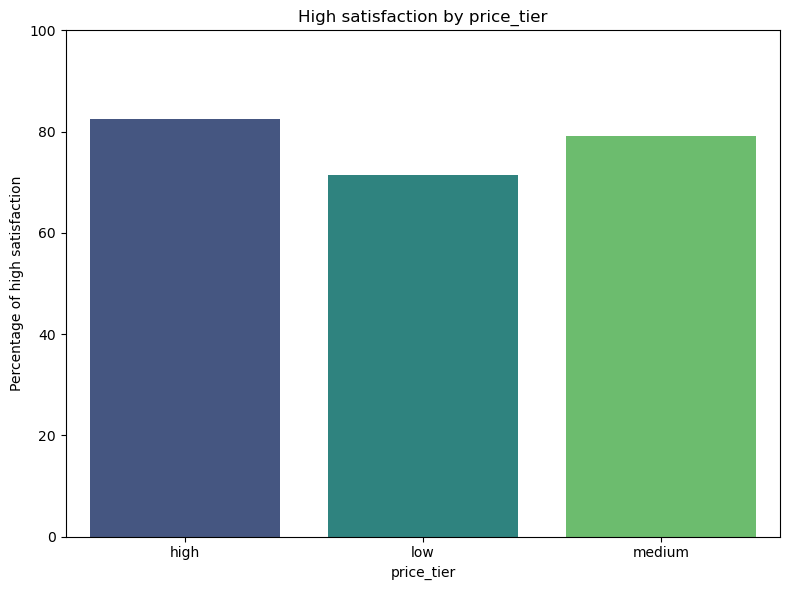

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/2636916914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


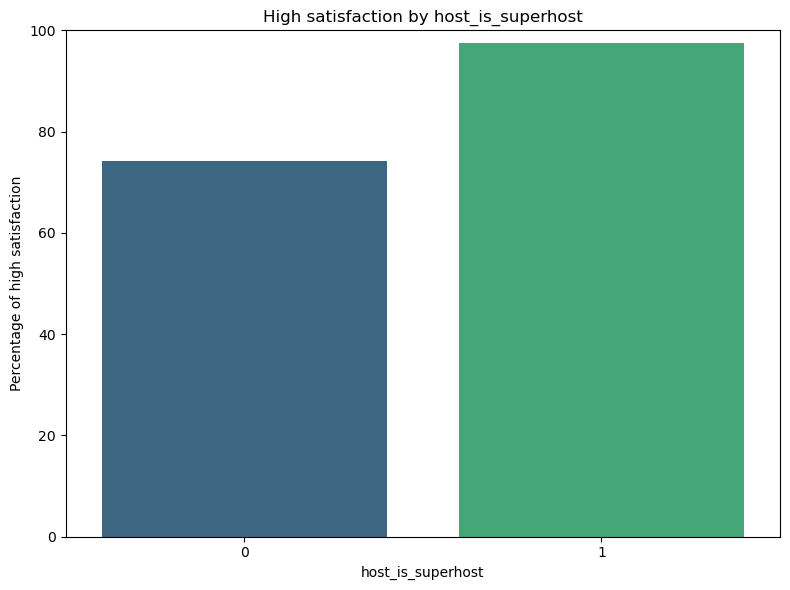

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/2636916914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


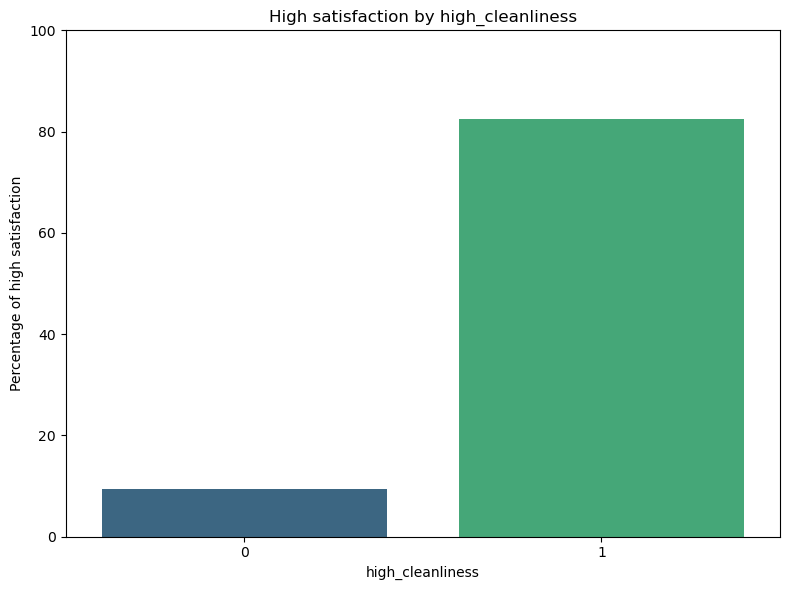

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/2636916914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")


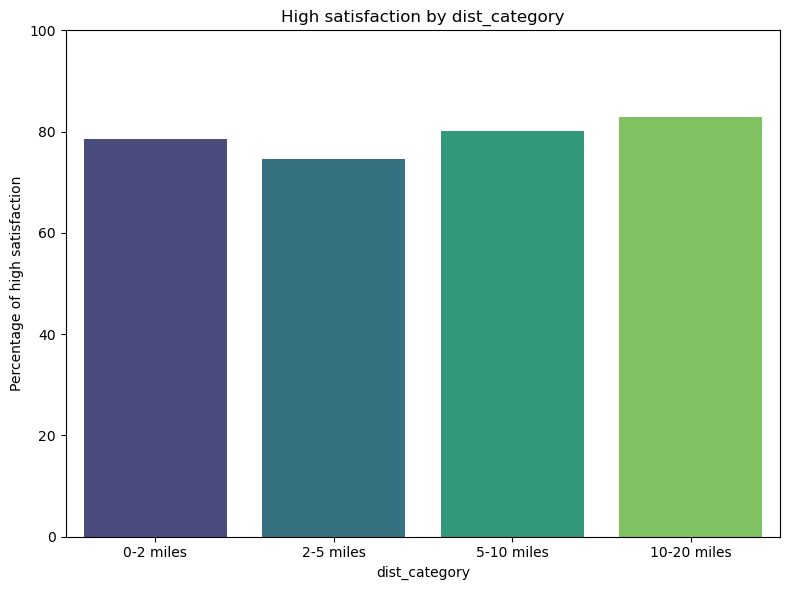

In [187]:
visualization_feature_proposotion(percentage_dict)

Finding and interpretation:

1. Room type:

    Finding:
        •Private Room has the highest percentage of high satisfaction (80.15%).
	    •Entire Home/Apt is slightly lower at 74.41%.
	    •Shared Room has the lowest percentage but still fairly high at 73.91%.

    Interpretation:
        •Private rooms outperform other room types, possibly due to the balance between affordability and privacy.
	    •Entire homes and shared rooms also provide high satisfaction, indicating that room type alone may not be the dominant factor but still influences guest satisfaction.

2. Price tier:

    Finding:
	    •High Price Tier has the highest satisfaction percentage at 82.51%.
	    •Medium Price Tier follows closely at 79.11%.
	    •Low Price Tier shows the lowest satisfaction at 71.41%.

    Interpretation:
	    •Higher price tiers are strongly associated with high satisfaction, likely due to better amenities, service, or quality.
	    •Medium price tiers perform almost as well as high tiers, suggesting good value-for-money properties.
	    •Low price tiers have lower satisfaction, potentially due to fewer amenities or lower quality.

3.Superhost Status:

    Finding:
        •Superhosts (1): 97.49% high satisfaction.
	    •Non-Superhosts (0): 74.26% high satisfaction.

    Intrpretation:
	    •Superhost status has the strongest association with high satisfaction among all features.
	    •Guests staying with Superhosts are significantly more likely to leave high satisfaction scores, likely due to better communication, service, and attention to detail

4.Cleanliness:

    Finding
	    •High Cleanliness (1): 82.57% high satisfaction.
	    •Low Cleanliness (0): Only 9.39% high satisfaction.

	Interpretation:
		•Cleanliness is a critical determinant of guest satisfaction.
		•Properties with poor cleanliness see drastically lower satisfaction scores, while high cleanliness ensures much better guest experiences.

5.Distance from City Center

	Finding:
		•10-20 miles: 82.96% (highest satisfaction).
		•5-10 miles: 80.09%.
		•0-2 miles: 78.45%.
		•2-5 miles: 74.50% (lowest satisfaction).

	Interpretation:
		•Properties located 10-20 miles from the city center show slightly higher satisfaction than properties closer to or farther from the city center.
		•Guests may prefer properties in quieter, suburban locations compared to those in highly urbanized or remote areas.

Conclusion: 

Most Associated Features with High Satisfaction:

1.Superhost Status:
	•	Superhosts exhibit the strongest correlation with high satisfaction (~97.5%), making it the most impactful feature.

2.Cleanliness:
	•	Cleanliness has a significant impact, with a stark contrast between high and low cleanliness scores (~82.57% vs. ~9.39%).

3.Price Tier:
	•	High and medium price tiers outperform low price tiers, indicating that pricing influences satisfaction, likely through quality and amenities.

4.Room Type:
	•	Private rooms are slightly more associated with high satisfaction compared to entire homes and shared rooms.

5.Distance:
	•	Distance plays a moderate role, with suburban locations (10-20 miles) being slightly more favored.
b

Logistic Regression: PREDICTIVE

Predict the likelihood of high satisfaction based on key features (room_type, price_tier, host_is_superhost, cleanliness)

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [189]:
#Creat backup df to use
df_q1 = df.copy()

In [190]:
#Converts categorical variables (room_type and price_tier) into binary dummy variables for each category.
df_q1 = pd.get_dummies(df_q1, columns=[ 'price_tier', 'room_type'], drop_first=True)

In [191]:
#defining feature X and Target Y
X = df_q1[["host_is_superhost","cleanliness_rating","dist", "room_type_Private room", "room_type_Shared room","price_tier_low",
       "price_tier_medium"]] # Independent variable 
Y = df_q1['high_satisfaction'] #Dependent variable

In [192]:
#Divide dataset into:
    #Training set = 70% data = to train model
    #Testing set = 30% = evaluate the model’s performance 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state= 73)  

In [193]:
#Train logistic regression model:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [194]:
#Prediction and model evaluation
satisfaction_pred = log_model.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, satisfaction_pred))
print("Accuracy Score:", accuracy_score(Y_test, satisfaction_pred))

 #The model performs better with class 1 (Precision and Recall are both high). This may be because class 1 constitutes a larger portion of the data (1089 samples compared to 296 samples for class 0).
#The Precision and Recall for class 0 are lower, indicating that the model might struggle to differentiate samples belonging to class 0 from class 1.
#Overall, the accuracy is high (88%)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       296
           1       0.91      0.93      0.92      1089

    accuracy                           0.88      1385
   macro avg       0.83      0.80      0.81      1385
weighted avg       0.88      0.88      0.88      1385

Accuracy Score: 0.8787003610108304


Visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

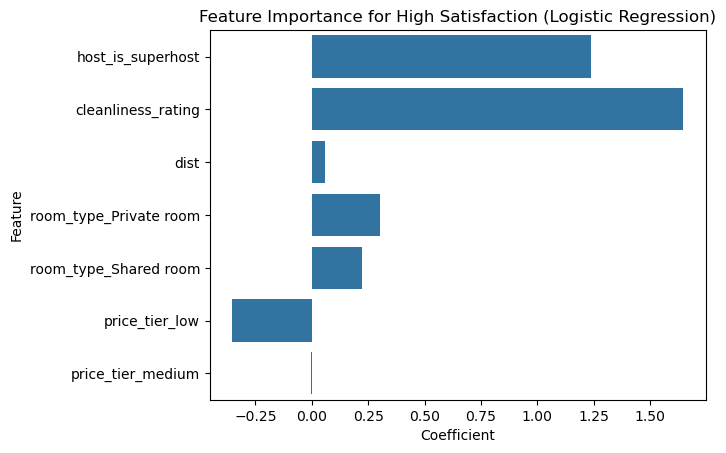

In [195]:
coefficients = pd.DataFrame({'Feature': X.columns, 
                             'Coefficient': log_model.coef_[0]})

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_model.coef_[0]})

sns.barplot(x='Coefficient', y = 'Feature', data = coefficients)
plt.title("Feature Importance for High Satisfaction (Logistic Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show


Finding and Interpretation:

1. Positive coefficients:

    Host status:
	    • Has the highest positive coefficient, indicating a strong positive association with high satisfaction.
	    • Being a Superhost significantly increases the likelihood of high satisfaction.
		=> Guests place significant value on the quality and trust associated with Superhosts.
	
	Cleanliness:
		• Another highly influential positive feature.
		• Properties with higher cleanliness ratings are much more likely to achieve high satisfaction.
		=> Cleanliness is a critical determinant of guest satisfaction.

	Room_private and room_shared:
		•Both have slight positive coefficients
		•The coefficients are small compared to other features like host_is_superhost or cleanliness_rating => impact is weaker.
		=> These types can still achieve high satisfaction but require strong support from other features like cleanliness and host quality
	
2. Negative coefficients:
	Price low:
		•Has a notable negative coefficient.
		=> Lower-priced properties are associated with lower likelihoods of high satisfaction, possibly due to fewer amenities or perceived quality.

	
3. Neutral/ Minimal impact:
	Price medium:
		•Its coefficient is close to zero, suggesting that medium-tier pricing does not strongly influence high satisfaction.

	Distance:
		•Has a small positive coefficient.
		•Slightly further distances from the city center appear to have a marginally positive effect on satisfaction.
		=> Distance from the city center does not negatively affect satisfaction as much as expected
		=> Suburban properties might offer benefits like tranquility and space.
	

Multiple linear regression analysis: Predictive

In [1]:
import statsmodels.api as sm

# Define the Features and target:
X = df_q1[['cleanliness_rating', 'realSum', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost']]
y = df_q1['guest_satisfaction_overall'] 
# conver boolen to int
X['room_type_Private room'] = X['room_type_Private room'].astype(int)
X['room_type_Shared room'] = X['room_type_Shared room'].astype(int)
# Add intercept to X
X = sm.add_constant(X)

# Fit Regression Model
model = sm.OLS(y, X).fit()
print(model.summary())

NameError: name 'df_q1' is not defined

Visualization: 

Visualizes the importance of each feature in predicting high satisfaction.

/var/folders/lf/mlj5qpsn1hs1_lmnxhbk5ggh0000gp/T/ipykernel_80782/3147825309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis', orient='h')


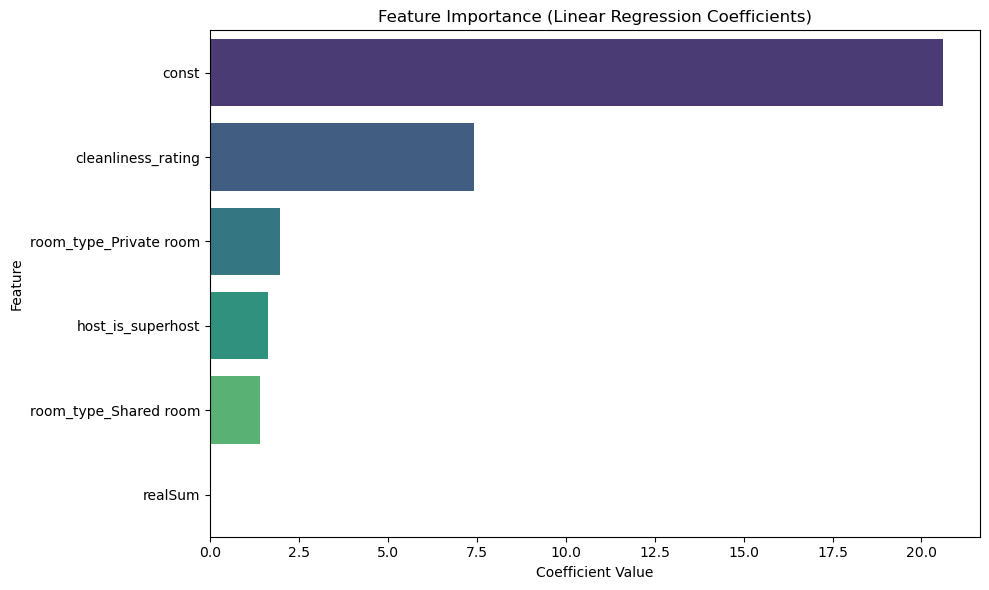

In [197]:

# Extract coefficients from the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.params
}).sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis', orient='h')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Finding and Interpretation

	1.	cleanliness_rating:
		•	Coefficient: 7.42, P-value: 0.000:
		•	Cleanliness has the largest positive impact on satisfaction.
		•	A one-unit increase in cleanliness rating increases satisfaction scores by 7.42 points on average, holding all other variables constant.
		•	This is highly statistically significant.
		=> 	Cleanliness has the largest and most significant positive effect on guest satisfaction.
	
	2.	room_type_Private room:
		•	Coefficient: 1.97, P-value: 0.000:
		•	PrBeing a Superhost significantly boosts satisfaction scores, highlighting the value of host quality.ivate rooms are associated with 1.97 points higher satisfaction compared to the reference category (Entire home/apt), holding other variables constant.
		•	This is statistically significant.
		=> 	Surprisingly, private rooms lead to higher satisfaction compared to entire homes, which may reflect affordability and value.

	3.	room_type_Shared room:
		•	Coefficient: 1.42, P-value: 0.375:
		•	Shared rooms are associated with 1.42 points higher satisfaction compared to the reference category (Entire home/apt), but this is not statistically significant due to a high p-value.
		=> •	Shared rooms show a slight positive impact but are not statistically significant.

	4.	host_is_superhost:
		•	Coefficient: 1.64, P-value: 0.000:
		•	Superhost status is associated with a 1.64-point increase in satisfaction scores.
		•	This is statistically significant and reinforces the importance of host quality.
		=> 	Being a Superhost significantly boosts satisfaction scores, highlighting the value of host quality.

	5.	realSum (price):
		•	Coefficient: 0.0013, P-value: 0.068:
		•	Price has a minimal positive impact on satisfaction scores.
		•	However, this is not statistically significant (P-value > 0.05).
		=> Price (realSum) has little effect on satisfaction when other factors are considered

	6.	Intercept (const):
		•	Coefficient: 20.61:
		•	Represents the baseline satisfaction score when all predictors are zero. While it’s not directly interpretable, it provides a reference point.
		

Conclusion:
	•Superhost status and cleanliness are the strongest predictors of high satisfaction.

	•While Shared Rooms and Private Rooms have a weaker association with high satisfaction compared to Entire Home/Apt, they still perform well when paired with strong cleanliness and service.
    
	•Price Tier and Location influence satisfaction, but their effects are secondary to cleanliness and host quality.

# Sub-Ques 2: Does the type of property influence customer satisfaction?

Approach:
    1. Perform ANOVA to test for differences in satisfaction scores across room_type.
    2. Use Tukey’s test for pairwise comparisons.
    3. Visualize satisfaction scores by room type using a box plot.

Visualization by room type:

Overall, the satisfaction scores for all property types are generally high, with most data points above 80.

Although the medians are similar, Entire home/apt might be perceived as a premium option due to privacy and amenities.

    •Entire home/apartment has the highest median guest satisfaction, with relatively fewer outliers.
    •Private rooms have a slightly lower median satisfaction, with more variability.

Shared room has, the lowest satisfaction and the widest spread, meaning guest experiences are more inconsistent (ranging from very low to high satisfaction).

<Axes: xlabel='room_type', ylabel='guest_satisfaction_overall'>

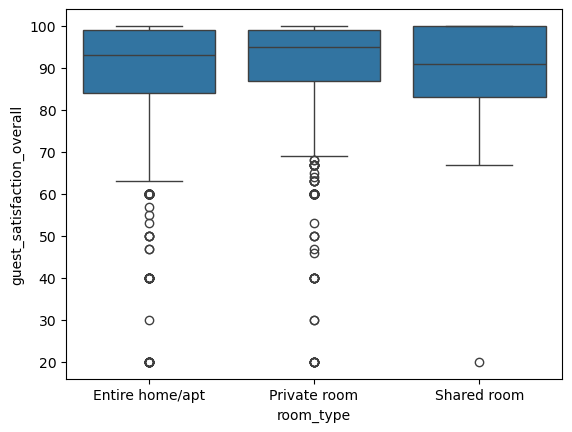

In [198]:
#Boxplot
sns.boxplot(x='room_type', y = 'guest_satisfaction_overall', data=df)

ANOVA: Comparative

f_stat = Larger values suggest more significant differences between groups
p_stat = A small p-value (e.g., < 0.05) indicates significant differences between group means.

Significant differences in satisfaction scores across property types

In [199]:
from scipy.stats import f_oneway

In [200]:
#def ANOVA function:
def anova(df, group_column, target_column):
    grouped_data= [df[df[group_column] == group][target_column].dropna() #Filters the DataFrame to select rows where the group_column equals the current group
                   for group in df[group_column].unique()
    ]
    #anova:
    f_stat, p_value = f_oneway(*grouped_data)
    if p_value <0.05:
        print(f'Significant differences in satisfaction scores across {group_column}')
    else:
        print('No significant differences')
    
    print(f'f_stat = {f_stat}, p-value = {p_value}')
    

In [201]:
anova(df, group_column='room_type', target_column='guest_satisfaction_overall')

Significant differences in satisfaction scores across room_type
f_stat = 24.397645643226657, p-value = 2.883426154715684e-11


Tukey's test: Comparative

Used to determine which specific pairs of room types have significantly different mean satisfaction scores. 

Applied if the ANOVA results indicate significant differences 

In [202]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#def the function
def tukey_test (df, tested_column, target_column, alpha = 0.05):
    tukey_results = pairwise_tukeyhsd(df[target_column], df[tested_column], alpha=0.05)
    print (tukey_results)

In [203]:

tukey_test(df, tested_column= 'room_type', target_column= 'guest_satisfaction_overall')
# Significant Differences: Entire home/apt > Private Room

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1        group2    meandiff p-adj   lower  upper  reject
------------------------------------------------------------------
Entire home/apt Private room   2.4046    0.0  1.5867 3.2225   True
Entire home/apt  Shared room  -1.3982 0.8361 -7.1495 4.3531  False
   Private room  Shared room  -3.8028 0.2667 -9.5457 1.9402  False
------------------------------------------------------------------


Finding and Interpretation:

Finding:

        1.ANOVA:
                •The ANOVA test produces an F-statistic of 24.40 and a p-value of 2.88e-11

        2.TUKEY'S:

                Entire home/apt vs. Private room:
	                •Mean difference: 2.4046
	                •p-adj (p-value): 0.0 (significant)
	        Conclusion: Entire homes/apartments yield significantly higher satisfaction than private rooms.

	        Entire home/apt vs. Shared room:
                        •Mean difference: -1.3982
                        •p-adj (p-value): 0.8361 (not significant)
                Conclusion: No significant difference in satisfaction between entire homes apartments and shared rooms.

	        Private room vs. Shared room:
                        •Mean difference: -3.8028
                        •p-adj (p-value): 0.2667 (not significant)
                Conclusion: No significant difference in satisfaction between private rooms and shared rooms.

Interpretation: 

        1.Entire Home/Apt:
	        Offers the highest guest satisfaction, likely due to the privacy, comfort, and amenities associated with having an entire property.

	2.Private Room:
	        Satisfaction is lower than entire homes but still comparable, indicating that affordability and shared spaces might slightly affect guest experience.

	3.Shared Room:
	        While the median satisfaction score is slightly lower, there is no statistically significant difference compared to other room types, suggesting that shared rooms can still meet guest expectations in some cases.




Conclusion:

1.Room Type Matters: Room type significantly impacts guest satisfaction, as shown by the ANOVA test.

2.Entire Homes Perform Best: Entire homes/apartments are associated with higher satisfaction compared to private rooms.

3.Shared Rooms Are Comparable: Despite the perception of lower satisfaction, shared rooms do not significantly underperform compared to private rooms or entire homes.

4.While entire homes/apartments generally perform better, the logistic regression shows that room type alone does not strongly determine high satisfaction if other features are optimized.


# Sub- ques 3: How does cleanliness impact satisfaction scores? 

Approach:
	1.	Calculate average satisfaction scores for each cleanliness rating.
	2.	Analyze the correlation between cleanliness and satisfaction.
	3.	Perform ANOVA to test differences in satisfaction across cleanliness ratings.
	4.	Visualize the results with box plots and scatter plots.

In [204]:
# Calculates the average satisfaction scores for each cleanliness rating.
cleanliness_satisfaction = df.groupby('cleanliness_rating')['guest_satisfaction_overall'].mean()
print(f'Average Satisfaction by Cleanliness: {cleanliness_satisfaction}')

Average Satisfaction by Cleanliness: cleanliness_rating
2.0     28.888889
3.0     40.000000
4.0     48.214286
5.0     55.437500
6.0     66.858974
7.0     75.176101
8.0     82.435407
9.0     89.655667
10.0    96.263135
Name: guest_satisfaction_overall, dtype: float64


Correlation Analysis: Descriptive

Quantifies the linear relationship between cleanliness ratings and satisfaction scores by Calculates the Pearson correlation coefficient (correlation) and the p-value (p_value).

In [205]:
from scipy.stats import pearsonr
def correlation_func (df, dependent_var, independent_var='guest_satisfaction_overall'):
    correlation, pvalue = pearsonr(df[dependent_var], df[independent_var])
    print(f"Correlation between {dependent_var} and Satisfaction: {correlation}, P-value: {pvalue}")

In [206]:
correlation_func (df, dependent_var= 'cleanliness_rating')

Correlation between cleanliness_rating and Satisfaction: 0.7615997050705403, P-value: 0.0


ANOVA Test: Comparative

Significant differences in satisfaction scores across cleanliness_rating
f_stat = 812.7419501249491, p-value = 0.0

In [207]:
anova(df, group_column='cleanliness_rating', target_column='guest_satisfaction_overall')

Significant differences in satisfaction scores across cleanliness_rating
f_stat = 812.7419501249491, p-value = 0.0


Tukey test: Comparative

The means of the two groups are statistically significantly different.

High cleanliness as a significantly higher mean compared to group 0 by approximately 26.66 units.

The adjusted p-value (0.0) indicates a statistically significant difference between the two groups.



In [208]:
tukey_test (df, tested_column= 'high_cleanliness', target_column= 'guest_satisfaction_overall')

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  26.6566   0.0 25.5383 27.7749   True
---------------------------------------------------


Visualization:

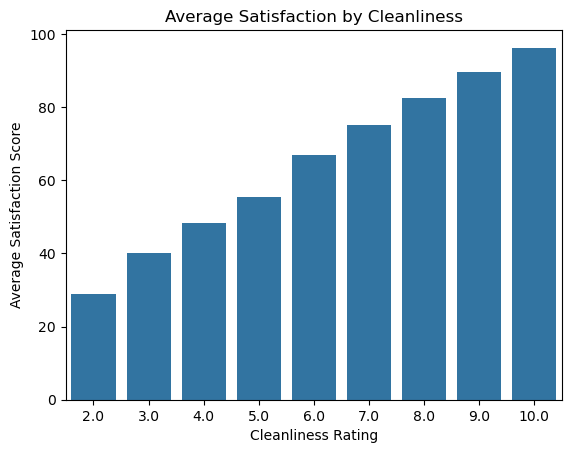

In [209]:
#By mean
cleanliness_satisfaction = cleanliness_satisfaction.reset_index()
sns.barplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=cleanliness_satisfaction)
plt.title("Average Satisfaction by Cleanliness")
plt.xlabel("Cleanliness Rating")
plt.ylabel("Average Satisfaction Score")
plt.show()

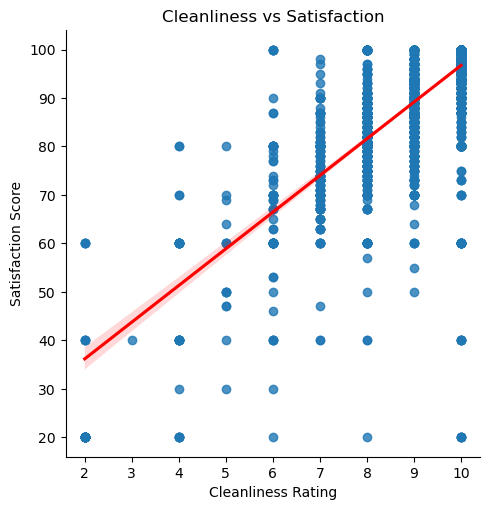

In [210]:
#By correlation
sns.lmplot(x = 'cleanliness_rating', y = 'guest_satisfaction_overall', data = df, line_kws={'color': 'red'})
plt.title('Cleanliness vs Satisfaction')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Satisfaction Score')
plt.show()

Finding and Interpretation:

Finding 1: Correlation Analysis

	Result:
	    •Correlation Coefficient = 0.76
	    •P-value = 0.00e+00

    Interpretation:
        • The correlation coefficient of 0.76 indicates a strong positive linear relationship between cleanliness ratings and guest satisfaction scores.
        • The p-value of 0.00e+00 confirms that this relationship is statistically significant and unlikely to be due to chance.
        • This suggests that as cleanliness ratings increase, guest satisfaction tends to increase significantly.

Finding 2: Bar Plot - Average Satisfaction by Cleanliness

	Result:
        • Satisfaction scores consistently increase with higher cleanliness ratings.
        • Properties with cleanliness ratings of 9 or 10 achieve near-perfect satisfaction scores.
        • Properties with cleanliness ratings below 5 show significantly lower satisfaction.

    Interpretation:
        • Cleanliness is a major factor influencing guest satisfaction.
        • Higher cleanliness ratings (e.g., 9 and 10) are strongly associated with excellent guest satisfaction, indicating that cleanliness is one of the most critical aspects of a positive guest experience.
        • Lower cleanliness ratings (2 to 5) result in substantially lower satisfaction scores, suggesting that guests are particularly sensitive to poor cleanliness standards.

Finding 3: Regression Plot - Cleanliness vs Satisfaction

	Result:
        • The scatter plot shows a clear positive trend, with higher cleanliness ratings associated with higher satisfaction scores.
        • The regression line visually confirms the strong positive relationship.
        • There is some variability in satisfaction for mid-range cleanliness ratings (e.g., 5 to 7).

    Interpretation:
        • The positive slope of the regression line reinforces the finding that higher cleanliness ratings lead to higher satisfaction scores.
        • While the trend is strong overall, the variability in satisfaction scores for mid-range cleanliness ratings suggests that additional factors (e.g., amenities, price, or host behavior) may influence satisfaction when cleanliness is moderate.




Conclusion:

Cleanliness is a key determinant of guest satisfaction, with a strong positive correlation (0.76). Properties with high cleanliness ratings consistently achieve higher satisfaction, while those with low cleanliness ratings underperform. By prioritizing cleanliness, both hosts and Airbnb can enhance the guest experience and boost overall satisfaction levels.

# Sub-ques 4: How do pricing strategies affect customer satisfaction?

Approach:
	1.	Analyze correlation between price (realSum) and satisfaction.
	2.	Compare satisfaction scores across price_tier using ANOVA and visualizations.
	3.	Regression Analysis: Predict satisfaction based on pricing while controlling for additional factors like room_type and cleanliness_rating.


Correlation analysis:

Seperate by room_type

In [211]:
room_types = df['room_type'].unique()

for room in room_types:
    subset = df[df['room_type'] == room]
    print(f'Room Type: {room}')
    correlation_func(subset,dependent_var= 'realSum')

Room Type: Entire home/apt
Correlation between realSum and Satisfaction: 0.09447965741656972, P-value: 2.717730264257017e-05
Room Type: Private room
Correlation between realSum and Satisfaction: 0.07929325913605076, P-value: 4.7613991784744425e-05
Room Type: Shared room
Correlation between realSum and Satisfaction: 0.20516380816143534, P-value: 0.34767760010204046


ANOVA:

By price tier

In [212]:
anova(df, group_column='price_tier', target_column='guest_satisfaction_overall')

Significant differences in satisfaction scores across price_tier
f_stat = 18.075351235416083, p-value = 1.5156094101732806e-08


Tukey's test:

In [213]:
tukey_results = tukey_test(df, tested_column='price_tier', target_column= 'guest_satisfaction_overall' )

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -2.5371    0.0 -3.5272 -1.5471   True
  high medium  -1.3555 0.0038 -2.3459 -0.3651   True
   low medium   1.1816 0.0143  0.1914  2.1719   True
----------------------------------------------------


Visualization:

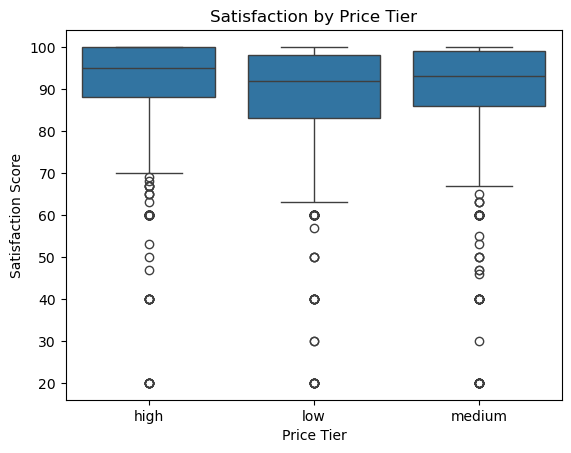

In [214]:
#ANOVA result: Use box plots to show differences in satisfaction scores across price tiers.
sns.boxplot(x='price_tier', y='guest_satisfaction_overall', data=df)
plt.title("Satisfaction by Price Tier")
plt.xlabel("Price Tier")
plt.ylabel("Satisfaction Score")
plt.show()

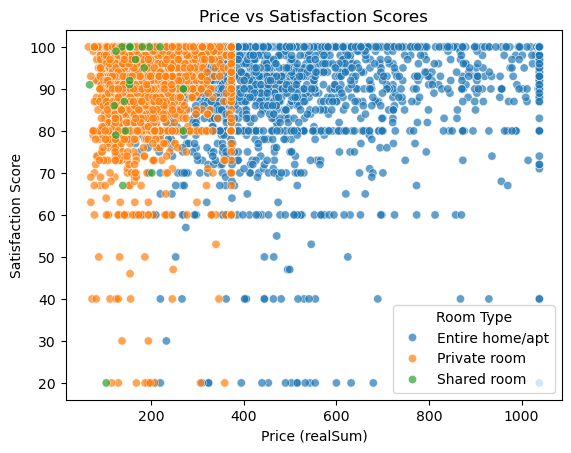

In [215]:
# Scatter Plot for Price vs. Satisfaction
sns.scatterplot(x='realSum', y='guest_satisfaction_overall', hue='room_type', data=df, alpha=0.7)
plt.title("Price vs Satisfaction Scores")
plt.xlabel("Price (realSum)")
plt.ylabel("Satisfaction Score")
plt.legend(title="Room Type")
plt.show()

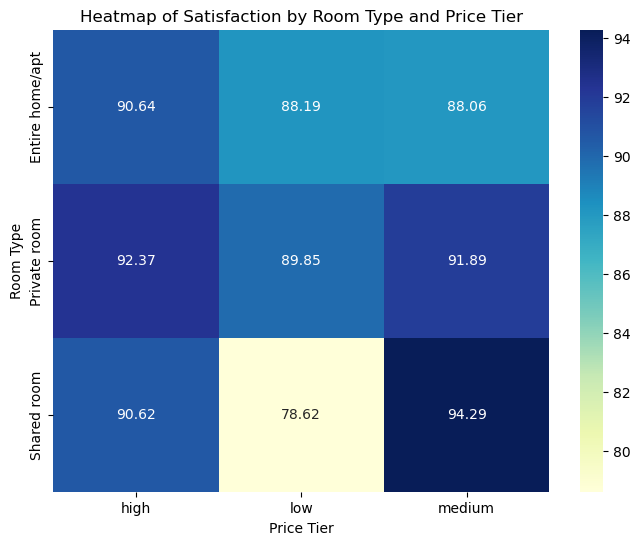

In [216]:
# Pivot the data for the heatmap
heatmap_data = df.pivot_table(
    values='guest_satisfaction_overall',  # Values to aggregate
    index='room_type',                   # Rows
    columns='price_tier',                # Columns
    aggfunc='mean'                       # Aggregation function
)


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Satisfaction by Room Type and Price Tier")
plt.xlabel("Price Tier")
plt.ylabel("Room Type")
plt.show()

Finding and interpretation:

1. Satisfaction by Price Tier (Boxplot and Tukey’s HSD Test)

	•	Findings:
        •	The boxplot shows that high, medium, and low price tiers have overlapping satisfaction distributions, but high-price tiers exhibit slightly higher median satisfaction.
        •	Tukey’s HSD test results indicate statistically significant differences:
        •	High vs Low: High-tier properties have significantly higher satisfaction than low-tier properties.
        •	High vs Medium: High-tier properties also outperform medium-tier properties in satisfaction.
        •	Low vs Medium: Medium-tier properties yield significantly higher satisfaction than low-tier properties.

	•	Interpretation:
        •	High-price tier properties consistently deliver better satisfaction, likely due to higher-quality amenities and services.
        •	Medium-price tier properties perform better than low tiers, possibly due to a balance of affordability and quality.
        •	Low-price tier properties are associated with lower satisfaction, possibly because of limited amenities or lower perceived value.

2. Correlation Between Price and Satisfaction by Room Type

	•   Findings:

                •Entire home/apt:
                        •	Correlation: 0.09 (weak positive).
                        •       Statistically significant (p-value = 2.72e-05).

                •Private room:
                        •	Correlation: 0.08 (weak positive).
                        •	Statistically significant (p-value = 4.76e-05).

                •Shared room:
                •	Correlation: 0.21 (moderate positive).
                •	Not statistically significant (p-value = 0.35).

	•    Interpretation:
                •Entire homes/apartments: The weak positive correlation suggests that while higher prices are slightly associated with increased satisfaction, other factors (e.g., cleanliness, amenities) may play a more significant role.

                •Private rooms: Similarly, price is weakly associated with satisfaction, with guests prioritizing other attributes like comfort and host quality.

                •Shared rooms: While showing a stronger correlation, the lack of statistical significance implies that price may not reliably predict satisfaction for shared accommodations.

3. Key Insight:

	Price Tier Differences:
        •	Satisfaction is highest for high-price tier properties, moderately high for medium-tier properties, and lowest for low-price tier properties.
        •	The differences are statistically significant across all price tiers.

	Room-Type-Specific Pricing Effects:
        •	Price has a weak but significant impact on satisfaction for entire homes/apartments and private rooms.
        •	For shared rooms, the price effect is more pronounced but not statistically reliable, suggesting variability in guest experiences.

Conclusion:

1.  Price Tier Impact:
	•	High-price tier properties consistently achieve the highest satisfaction, followed by medium and low-price tiers. The differences are statistically significant, highlighting the importance of quality amenities and services.

2.	Room-Type-Specific Pricing:
	•	Price has a weak but significant impact on satisfaction for entire homes and private rooms, while for shared rooms, the effect is less consistent and not statistically significant.



# Sub-ques 5: How does Superhost status impact satisfaction scores?
 
Approach

	1.	Descriptive Analysis: Compare the mean satisfaction scores for Superhosts (host_is_superhost = 1) and non-Superhosts (host_is_superhost = 0).

	2.	T-test: Test for statistically significant differences in satisfaction scores between the two groups.

	3.	Regression Analysis: Include host_is_superhost as a predictor in a regression model to assess its unique contribution to satisfaction.

	4.	Visualization: Visualize satisfaction scores using box plots for Superhosts and non-Superhosts.

Descriptive analysis

In [217]:
superhost_mean = df.groupby('host_is_superhost')['guest_satisfaction_overall'].mean()
print(f'Mean Satisfaction by Superhost: {superhost_mean}')

Mean Satisfaction by Superhost: host_is_superhost
0    89.247205
1    96.578171
Name: guest_satisfaction_overall, dtype: float64


Correlation

In [218]:
correlation_func(df, dependent_var='host_is_superhost')

Correlation between host_is_superhost and Satisfaction: 0.22081037930552888, P-value: 4.613584104998904e-52


T - test

In [219]:
from scipy.stats import ttest_ind

# Separate Superhost and Non-Superhost Scores
superhost = df[df['host_is_superhost'] == 1]['guest_satisfaction_overall']
non_superhost = df[df['host_is_superhost'] == 0]['guest_satisfaction_overall']

# T-test
t_stat, p_value = ttest_ind(superhost, non_superhost, nan_policy='omit')
print(f"T-test Results: T-statistic = {t_stat:.2f}, P-value = {p_value:.2e}")

T-test Results: T-statistic = 15.38, P-value = 4.61e-52


Visualization:

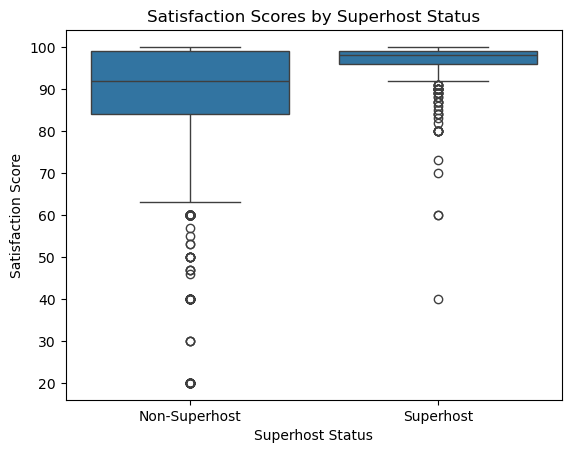

In [220]:
# Box Plot for Superhost Status
sns.boxplot(x='host_is_superhost', y='guest_satisfaction_overall', data=df)
plt.title("Satisfaction Scores by Superhost Status")
plt.xlabel("Superhost Status")
plt.ylabel("Satisfaction Score")
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])
plt.show()

Finding and Interpretation:

1. Descriptive:

        Finding:
                •	Mean satisfaction scores:
                •	Non-Superhosts: 89.25
                •	Superhosts: 96.58
                •	The satisfaction score for Superhosts is 7.33 points higher on average than for Non-Superhosts.
    
    	Interpretation:
	         •	Superhosts consistently outperform Non-Superhosts in guest satisfaction, showcasing their reliability and higher standards of service

2. Correlation:

	Finding:
                •	Correlation between host_is_superhost and guest satisfaction:
                •	Correlation coefficient = 0.22 (weak positive correlation).
                •	P-value = 4.61e-52 (highly significant).

	Interpretation:
                •	While Superhost status alone does not fully explain satisfaction, it is an important factor that contributes positively to guest ratings.
                •	Other factors, such as cleanliness or property type, likely interact with Superhost status to influence satisfaction.

3. T - test: 	

        Finding:
                •	The T-test confirms a statistically significant difference in guest satisfaction scores between Superhosts and Non-Superhosts:
                •	T-statistic = 15.38
                •	P-value = 4.61e-52 (highly significant).

	Interpretation:
                •	This confirms that being a Superhost has a significant impact on guest satisfaction.
                •	Superhosts’ higher scores are not due to random variation but reflect their superior performance.

4. Box plot: 

        Finding:
                •	The box plot shows a clear difference between Superhosts and Non-Superhosts:
                •	Superhosts have a higher median satisfaction score compared to Non-Superhosts.
                •	The variability in satisfaction scores for Superhosts is lower, indicating consistent performance.
                •	Non-Superhosts exhibit wider variability, with more outliers at the lower end of satisfaction.

	Interpretation:
                •	Superhosts likely provide a more consistent guest experience that leads to higher satisfaction ratings.
                •	The wide variability for Non-Superhosts suggests that their performance is less predictable, potentially due to inconsistencies in service quality.

Insight:

Superhost status is a key driver of guest satisfaction. Guests perceive Superhosts as more reliable and professional, leading to consistently higher satisfaction ratings. This is statistically validated by the T-test and the mean difference in satisfaction scores.

conclusion

Superhost status significantly enhances guest satisfaction, both in terms of consistency and overall scores. The results demonstrate the tangible benefits of achieving and maintaining Superhost status for hosts.